In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Social_Network_Ads.csv')
data.head()



,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X=data.iloc[:,2:4].values

In [4]:
X.shape

(400, 2)

In [5]:
y=data.iloc[:,-1].values

In [6]:
y.shape

(400,)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20)
X_train.shape

(320, 2)

In [8]:
X_test.shape

(80, 2)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.75139682, -0.24739178],
       [ 2.15021601, -0.71721593],
       [-1.42843982, -0.21802777],
       [-0.36451511, -1.33386012],
       [-0.94483768, -0.33548381],
       [-1.42843982, -1.24576809],
       [ 0.31252788,  0.04624831],
       [ 0.0223666 ,  0.28116039],
       [ 0.31252788, -0.74657993],
       [-0.94483768,  0.48670845],
       [ 2.15021601,  0.36925242],
       [-0.07435383,  0.01688431],
       [ 0.11908703,  1.04462463],
       [-0.36451511,  0.04624831],
       [-1.91204196,  0.45734444],
       [-1.81532153, -1.51004417],
       [ 0.98957088, -1.09894805],
       [ 1.56989345,  1.10335265],
       [ 0.60268917, -0.92276399],
       [ 0.98957088,  0.75098454],
       [ 1.7633343 , -0.3061198 ],
       [-0.26779468,  0.07561232],
       [ 0.11908703,  1.51444878],
       [-0.84811725,  0.36925242],
       [ 0.31252788,  0.28116039],
       [ 0.40924831,  0.07561232],
       [ 1.95677516,  0.89780458],
       [-1.62188068,  0.51607246],
       [-1.04155811,

In [10]:
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.25535395,  1.17910945],
       [-1.47740499,  0.02911836],
       [-0.20063525,  0.14706617],
       [ 0.16415611,  0.11757922],
       [-1.02141579,  0.55988348],
       [ 0.80254098, -1.03241187],
       [ 0.34655179,  0.35347482],
       [-1.65980066, -1.20933358],
       [-0.01823957,  2.06371798],
       [ 0.98493666,  0.20604007],
       [ 0.6201453 ,  2.12269188],
       [-1.11261363,  0.38296178],
       [ 0.98493666,  1.53295286],
       [ 1.98811288,  1.85730932],
       [ 0.25535395,  0.32398787],
       [-0.47422876,  0.55988348],
       [-0.01823957,  0.23552702],
       [-0.5654266 ,  1.50346591],
       [-0.20063525, -1.29779443],
       [ 1.44092585,  0.14706617],
       [-0.20063525, -0.05934249],
       [ 0.07295827,  0.11757922],
       [ 0.71134314,  0.35347482],
       [ 0.71134314, -1.20933358],
       [-1.11261363,  0.58937043],
       [-1.20381147,  0.64834433],
       [-0.5654266 , -0.02985554],
       [ 1.89691505, -0.85549017],
       [-0.47422876,

In [11]:
np.sqrt(X_train.shape[0])

np.float64(17.88854381999832)

In [12]:
k=17
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

#train the model
knn.fit(X_train,y_train)

,n_neighbors,17
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
y_pred=knn.predict(X_test)
y_pred.shape

(80,)

In [14]:
y_test.shape

(80,)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[51,  6],
       [ 2, 21]])

In [17]:
accuracy=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))


In [18]:
accuracy

[0.8,
 0.8125,
 0.8375,
 0.875,
 0.9,
 0.9,
 0.925,
 0.8875,
 0.9125,
 0.8875,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.9,
 0.9]

In [19]:
len(accuracy)

25

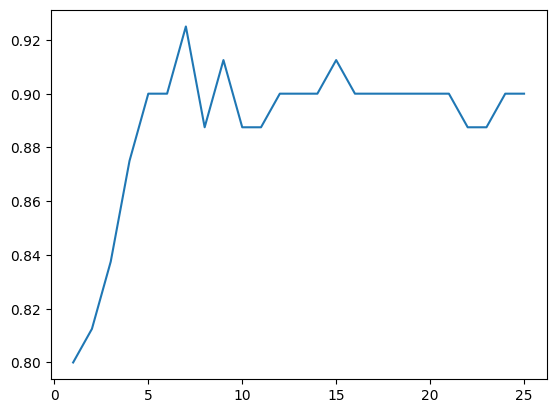

In [20]:
plt.plot(range(1,26),accuracy)

In [21]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9

In [23]:
def predict_output(age,salary):

    X_new= np.array([[age,salary]]).reshape(1,2)
    X_new=  scaler.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [24]:
predict_output(45,20000)

'Will purchase'

In [26]:
x=np.array([1,2,3])
y=np.array([4,5,6,7])

np.meshgrid(x,y)


(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6],
        [7, 7, 7]]))